In [66]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv("file.csv")
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52524 non-null  int64  
 1   CustomerID           52524 non-null  float64
 2   Gender               52524 non-null  object 
 3   Location             52524 non-null  object 
 4   Tenure_Months        52524 non-null  float64
 5   Transaction_ID       52524 non-null  float64
 6   Transaction_Date     52524 non-null  object 
 7   Product_SKU          52524 non-null  object 
 8   Product_Description  52524 non-null  object 
 9   Product_Category     52524 non-null  object 
 10  Quantity             52524 non-null  float64
 11  Avg_Price            52524 non-null  float64
 12  Delivery_Charges     52524 non-null  float64
 13  Coupon_Status        52524 non-null  object 
 14  GST                  52524 non-null  float64
 15  Date                 52524 non-null  obje

In [68]:
data.duplicated().value_counts()

False    52524
Name: count, dtype: int64

In [69]:
data.CustomerID.nunique()

1468

In [70]:
data.shape

(52524, 21)

In [71]:
data.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000
mean,26372.364176,15345.347213,26.140393,32445.093367,4.500171,52.429089,10.476922,0.137433,2832.428985,1894.216417,6.665810,19.953164
std,15232.596810,1766.862675,13.473500,8654.724704,20.159985,64.156649,19.343153,0.045865,935.612254,807.160639,3.335292,8.127280
min,0.000000,12346.000000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13170.750000,13869.000000,15.000000,25404.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26361.500000,15311.000000,27.000000,32678.000000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39557.250000,16996.000000,37.000000,39174.250000,2.000000,119.000000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52923.000000,18283.000000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


Text(0.5, 1.0, 'Максимальная выплата каждого клиента')

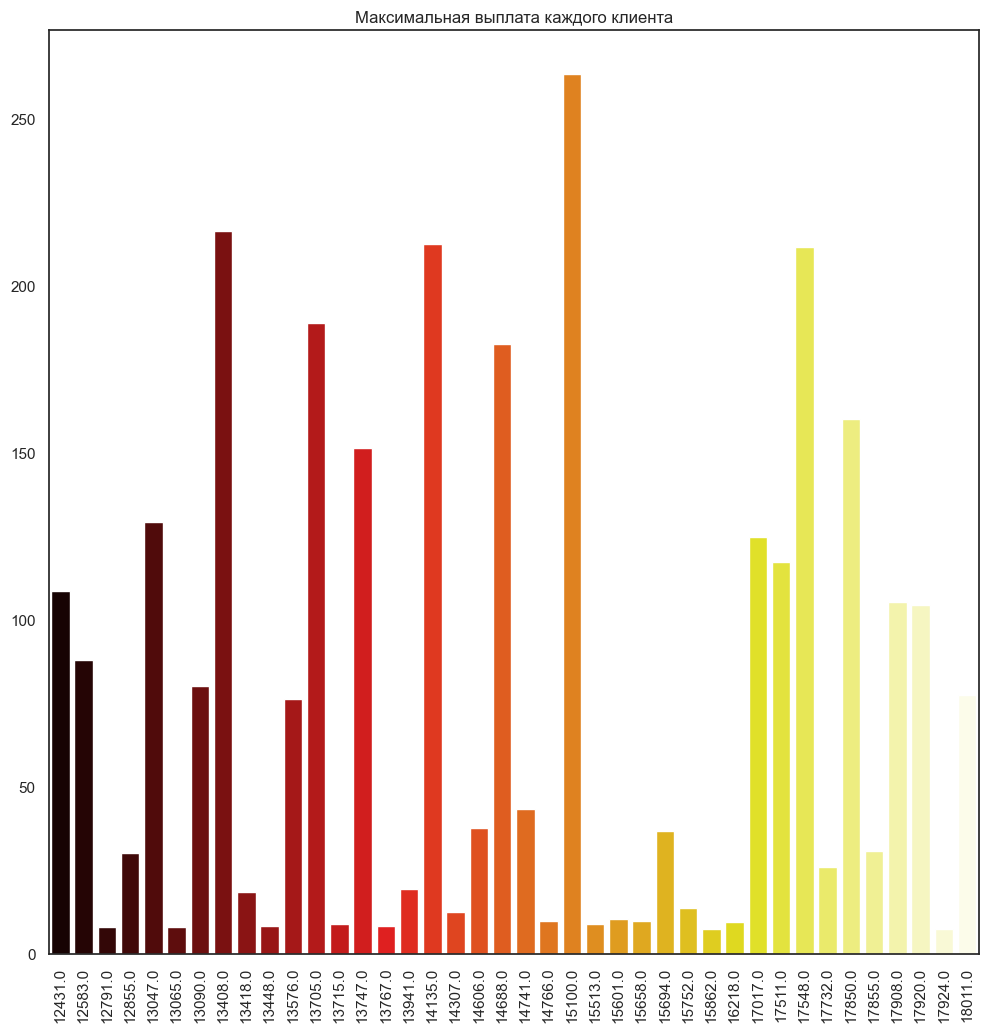

In [72]:
data.drop(['Transaction_ID', 'Product_SKU', 'Transaction_Date', 'Date'], axis=1, inplace=True)
data = data.drop_duplicates()
data['Total Prices'] = data.Avg_Price + data.Delivery_Charges
val1 = data['Total Prices']
val1 = data[['CustomerID', 'Total Prices']]

x = val1.CustomerID.unique()[:40]
y = val1['Total Prices'].unique()[:40]
fig, axis = plt.subplots(figsize=(12, 12))

val1 = val1.sort_values(by='Total Prices', ascending=False)
sb.barplot(x = x, y = y,palette='hot', ax=axis)
plt.xticks(rotation=90)
plt.title("Максимальная выплата каждого клиента")

Text(0.5, 1.0, 'Топ 30 клиентов по количеству покупок')

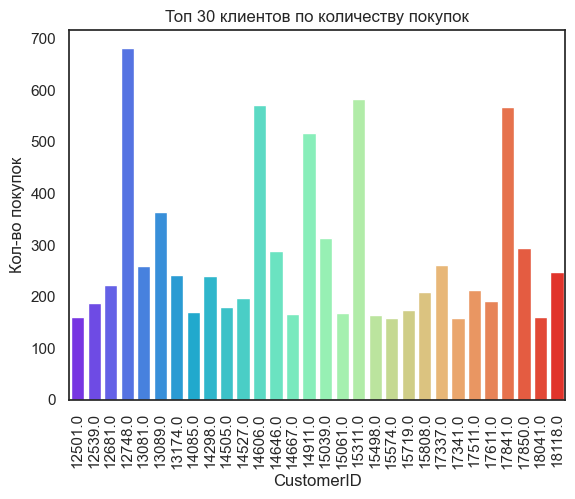

In [73]:
val2 = data.CustomerID.value_counts().sort_values(ascending=False).head(30)
sb.barplot(x = val2.index, y = val2, palette='rainbow')

plt.xticks(rotation=90)
plt.ylabel('Кол-во покупок')
plt.title('Топ 30 клиентов по количеству покупок')

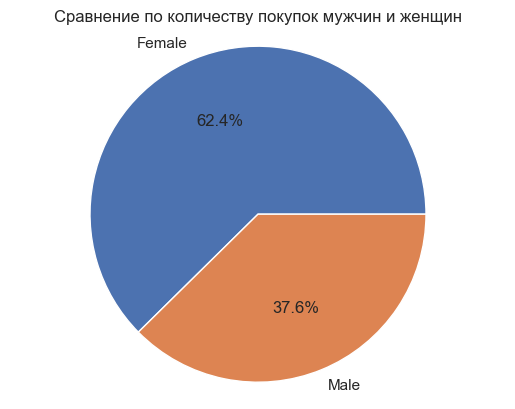

In [74]:
val3 = data.Gender.value_counts()
plt.pie(val3, labels=['Female','Male'], autopct="%1.1f%%")
plt.axis('equal')
plt.title('Сравнение по количеству покупок мужчин и женщин')
sb.set(style='white')

Text(0.5, 1.0, 'Общая сумма расходов за месяц')

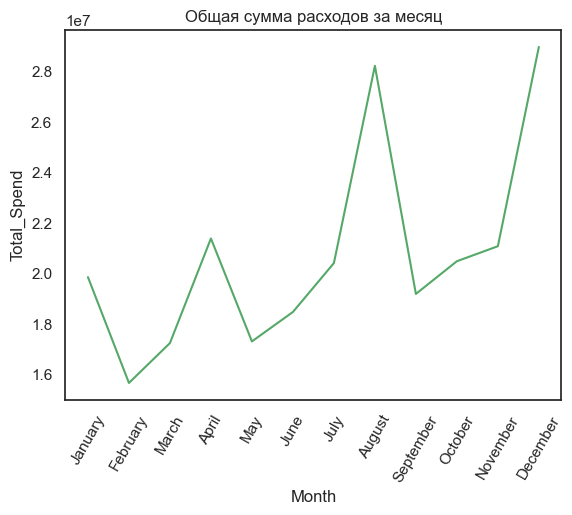

In [75]:
import calendar

data['Total_Spend'] = data['Offline_Spend'] + data['Online_Spend']
new = data.groupby('Month').sum()
mon = list(calendar.month_name)[1:]

sb.lineplot(y=new.Total_Spend, x=new.index,color='g')
plt.xticks(new.index, mon, rotation=60)
plt.title("Общая сумма расходов за месяц")

Text(0.5, 1.0, 'Общее количество онлайн-трат за месяц')

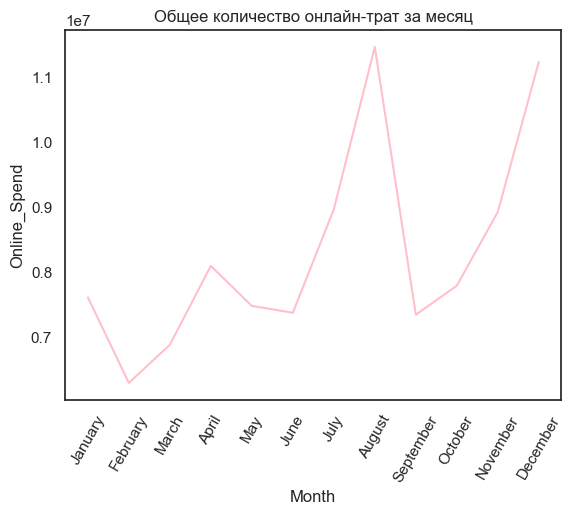

In [76]:
sb.lineplot(y=new.Online_Spend, x=new.index, color='pink')
plt.xticks(new.index, mon, rotation=60)
plt.title("Общее количество онлайн-трат за месяц")

Text(0.5, 1.0, 'Общее количество оффлайн-трат за месяц')

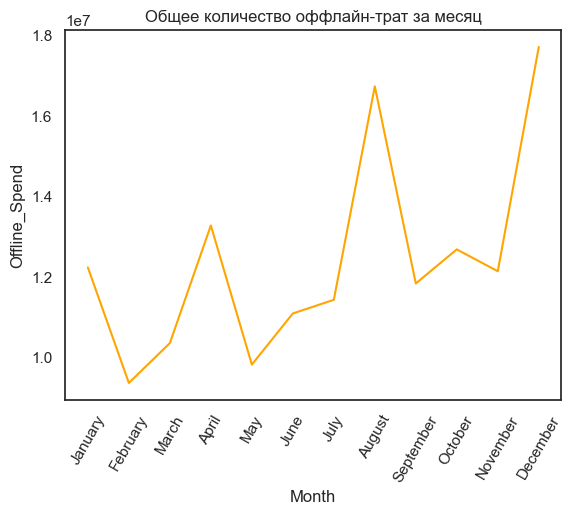

In [77]:
sb.lineplot(y=new.Offline_Spend, x=new.index, color='orange')
plt.xticks(new.index, mon, rotation=60)
plt.title("Общее количество оффлайн-трат за месяц")

Text(0.5, 1.0, 'Месячные траты')

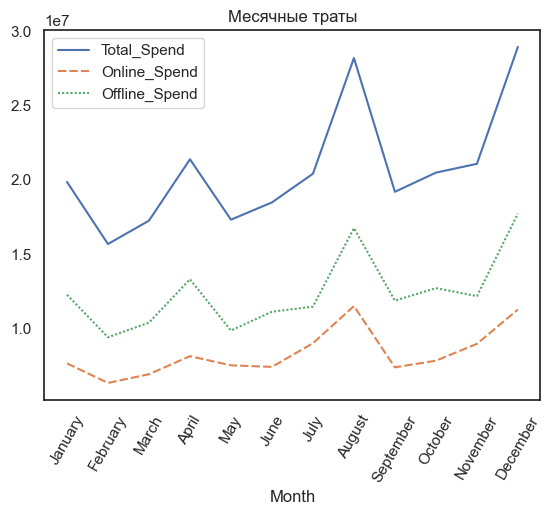

In [78]:
Spends = [new.Total_Spend, new.Online_Spend, new.Offline_Spend]

sb.lineplot(data=Spends)
plt.xticks(new.index, mon, rotation=60)
plt.title("Месячные траты")

Text(0.5, 1.0, 'Общая стоимость доставки в месяц')

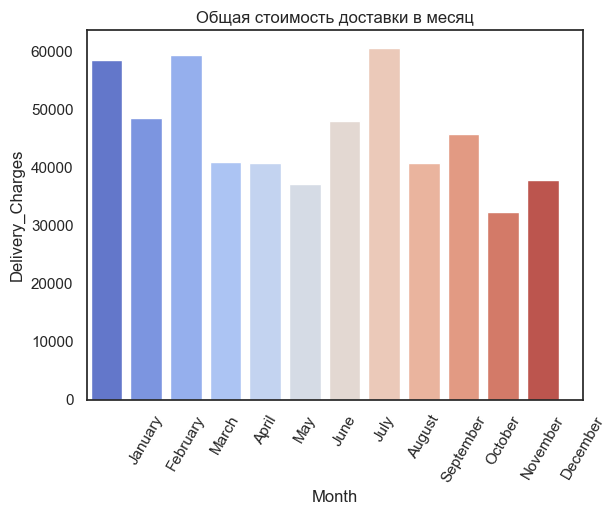

In [79]:
delivery = data[['Delivery_Charges','Month']].groupby('Month').sum()
sb.barplot(data=delivery, x=delivery.index, y='Delivery_Charges', palette='coolwarm')
plt.xticks(delivery.index, mon, rotation=60)
plt.title("Общая стоимость доставки в месяц")

Text(0.5, 1.0, 'Частотный анализ категории продукта')

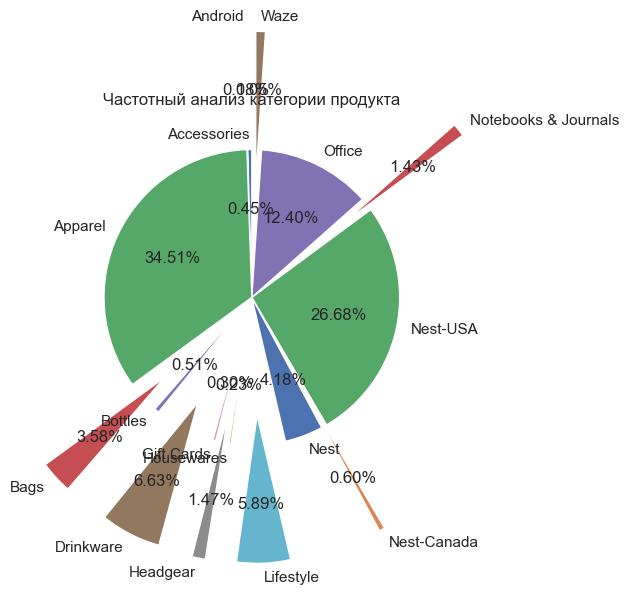

In [80]:
new1 = data.groupby('Product_Category').size()
plt.pie(new1, labels=new1.index, autopct="%1.2f%%", startangle=90, explode=[0.8 if i%2==1 else 0 for i in range(len(new1))])
plt.title("Частотный анализ категории продукта")

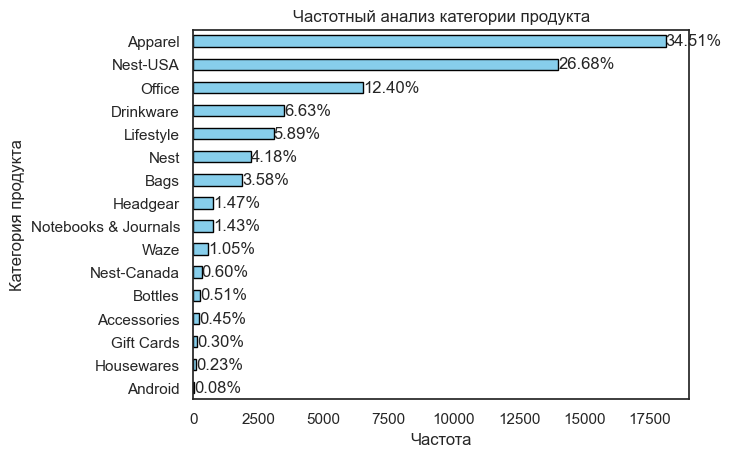

In [81]:
new1 = data.groupby('Product_Category').size()

fig, ax = plt.subplots()

new1.sort_values().plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

for index, value in enumerate(new1.sort_values()):
    ax.text(value, index, f'{value/sum(new1)*100:.2f}%', va='center')

ax.set_xlabel('Частота')
ax.set_ylabel('Категория продукта')
plt.title("Частотный анализ категории продукта")

plt.show()

Text(0.5, 1.0, 'Максимальное количество Товаров, приобретенных Пользователями')

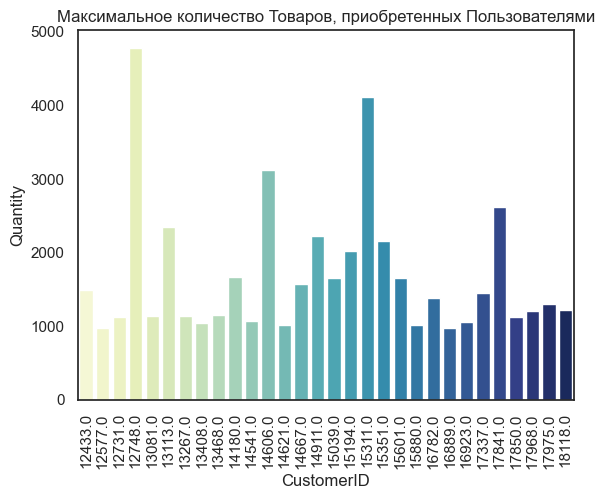

In [82]:
quan = data[['CustomerID','Quantity']].groupby('CustomerID').sum()
val8 = quan.sort_values(by='Quantity', ascending=False).head(30)
sb.barplot(data=val8, x=val8.index, y='Quantity', palette='YlGnBu')
plt.xticks(rotation=90)
plt.title("Максимальное количество Товаров, приобретенных Пользователями")

In [83]:
#